In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
species = pd.read_csv("species_info.csv")
observations = pd.read_csv("observations.csv")

## Explore

In [3]:
species

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


In [4]:
print(f"Unique Species: {species.scientific_name.nunique()}")
print(f"Unique Categories: {species.category.nunique()} {species.category.unique()}")
species.groupby("category").scientific_name.count().reset_index()

Unique Species: 5541
Unique Categories: 7 ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


,category,scientific_name
0,Amphibian,80
1,Bird,521
2,Fish,127
3,Mammal,214
4,Nonvascular Plant,333
5,Reptile,79
6,Vascular Plant,4470


In [5]:
species.conservation_status = species["conservation_status"].fillna("Species of no Concern")
species

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Species of no Concern
1,Mammal,Bos bison,"American Bison, Bison",Species of no Concern
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Species of no Concern
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Species of no Concern
4,Mammal,Cervus elaphus,Wapiti Or Elk,Species of no Concern
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,Species of no Concern
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",Species of no Concern
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",Species of no Concern
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",Species of no Concern


In [6]:
print(f"Conservation Statuses: {species.conservation_status.unique()}")
species.groupby(["conservation_status", "category"]).scientific_name.count().unstack()

Conservation Statuses: ['Species of no Concern' 'Species of Concern' 'Endangered' 'Threatened'
 'In Recovery']


category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Species of no Concern,73.0,442.0,116.0,176.0,328.0,74.0,4424.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


In [7]:
species.groupby(["conservation_status"]).scientific_name.count().reset_index()

,conservation_status,scientific_name
0,Endangered,16
1,In Recovery,4
2,Species of Concern,161
3,Species of no Concern,5633
4,Threatened,10


In [8]:
observations

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


In [9]:
print(f"Total Observations: {observations.observations.sum()}")
print(f"Species: {observations.scientific_name.nunique()}")
print(f"Parks: {observations.park_name.nunique()} {observations.park_name.unique()}")
observations.groupby(["park_name"]).observations.sum().reset_index()

Total Observations: 3314739
Species: 5541
Parks: 4 ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


,park_name,observations
0,Bryce National Park,576025
1,Great Smoky Mountains National Park,431820
2,Yellowstone National Park,1443562
3,Yosemite National Park,863332


## Analyze

### Project Goals
- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

In [10]:
speciesr = pd.read_csv("species_info.csv")

In [11]:
speciez = speciesr.groupby(["conservation_status", "category"]).scientific_name.count().reset_index()

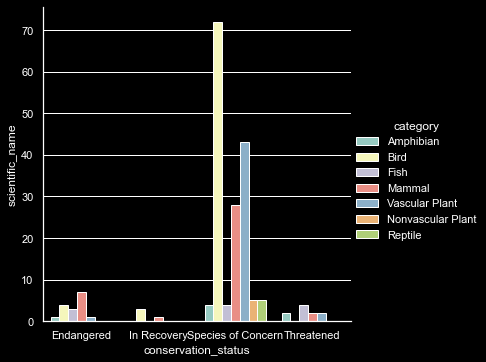

In [12]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.set_theme(style="whitegrid")
plt.style.use(["dark_background"])

sns.catplot(data=speciez, kind="bar", x="conservation_status", y="scientific_name", hue="category")

plt.show()

In [13]:
species["protected"] = species.conservation_status != "Species of no Concern"

categorical = species.groupby(["category", "protected"]).scientific_name.count().reset_index()
categorical = categorical.pivot(columns="protected", index="category", values="scientific_name").reset_index()
categorical.columns = ["category", 'not_protected', 'protected']
categorical["percentage"] = round(((categorical.protected / categorical.not_protected) * 100), 2)

categorical

,category,not_protected,protected,percentage
0,Amphibian,73,7,9.59
1,Bird,442,79,17.87
2,Fish,116,11,9.48
3,Mammal,176,38,21.59
4,Nonvascular Plant,328,5,1.52
5,Reptile,74,5,6.76
6,Vascular Plant,4424,46,1.04


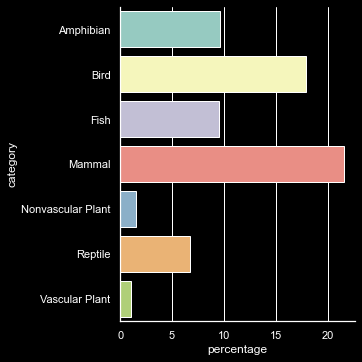

In [14]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.set_theme(style="whitegrid")
plt.style.use(["dark_background"])

sns.catplot(data=categorical, kind="bar", x="percentage", y="category")

plt.show()

In [15]:
from itertools import chain
import string

In [28]:
species

,category,scientific_name,common_names,conservation_status,protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Species of no Concern,False
1,Mammal,Bos bison,"American Bison, Bison",Species of no Concern,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Species of no Concern,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Species of no Concern,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,Species of no Concern,False
...,...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,Species of no Concern,False
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",Species of no Concern,False
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",Species of no Concern,False
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",Species of no Concern,False


In [39]:
def remove_punctuations(text):
    for x in string.punctuation:
        text = text.replace(x, '')
    return text

species = species[species.category != "Nonvascular Plant"]
names = list(species[species.category != "Vascular Plant"].common_names.apply(remove_punctuations).str.split())
names

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer'],
 ['Feral', 'Hog', 'Wild', 'Pig'],
 ['Coyote'],
 ['Gray', 'Wolf'],
 ['Red', 'Wolf'],
 ['Common', 'Gray', 'Fox', 'Gray', 'Fox'],
 ['Black', 'Fox', 'Cross', 'Fox', 'Red', 'Fox', 'Silver', 'Fox'],
 ['Red', 'Fox'],
 ['Mountain', 'Lion'],
 ['Wild', 'Cat', 'Wildcat'],
 ['Bobcat'],
 ['Panther', 'Mountain', 'Lion'],
 ['Striped', 'Skunk'],
 ['Eastern', 'Spotted', 'Skunk'],
 ['River', 'Otter'],
 ['Northern', 'River', 'Otter'],
 ['Fisher'],
 ['Mink', 'Or', 'Weasel'],
 ['LongTailed', 'Weasel'],
 ['Least', 'Weasel'],
 ['Mink'],
 ['Common', 'Raccoon', 'Raccoon'],
 ['Black', 'Bear'],
 ['Rafinesques', 'BigEared', 'Bat'],
 ['Big', 'Brown', 'Bat'],
 ['SilverHaired', 'Bat'],
 ['Eastern', 'Red', 'Bat', 'Red', 'Bat'],
 ['Hoary', 

In [40]:
rem_dups = []
for name in names:
    name = list(dict.fromkeys(name))
    rem_dups.append(name)
rem_dups

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer'],
 ['Feral', 'Hog', 'Wild', 'Pig'],
 ['Coyote'],
 ['Gray', 'Wolf'],
 ['Red', 'Wolf'],
 ['Common', 'Gray', 'Fox'],
 ['Black', 'Fox', 'Cross', 'Red', 'Silver'],
 ['Red', 'Fox'],
 ['Mountain', 'Lion'],
 ['Wild', 'Cat', 'Wildcat'],
 ['Bobcat'],
 ['Panther', 'Mountain', 'Lion'],
 ['Striped', 'Skunk'],
 ['Eastern', 'Spotted', 'Skunk'],
 ['River', 'Otter'],
 ['Northern', 'River', 'Otter'],
 ['Fisher'],
 ['Mink', 'Or', 'Weasel'],
 ['LongTailed', 'Weasel'],
 ['Least', 'Weasel'],
 ['Mink'],
 ['Common', 'Raccoon'],
 ['Black', 'Bear'],
 ['Rafinesques', 'BigEared', 'Bat'],
 ['Big', 'Brown', 'Bat'],
 ['SilverHaired', 'Bat'],
 ['Eastern', 'Red', 'Bat'],
 ['Hoary', 'Bat'],
 ['Mississippi', 'Myotis', 'Southeastern'],
 ['Gray', 'Myotis'],
 ['Keens', 'Myotis'],
 ['Eastern', 'SmallFooted'

In [41]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in rem_dups))
res

['Gappers',
 'RedBacked',
 'Vole',
 'American',
 'Bison',
 'Aurochs',
 'Domestic',
 'Cattle',
 'Feral',
 'Domesticated',
 'Domestic',
 'Sheep',
 'Mouflon',
 'Red',
 'Feral',
 'Wapiti',
 'Or',
 'Elk',
 'WhiteTailed',
 'Deer',
 'Feral',
 'Hog',
 'Wild',
 'Pig',
 'Coyote',
 'Gray',
 'Wolf',
 'Red',
 'Wolf',
 'Common',
 'Gray',
 'Fox',
 'Black',
 'Fox',
 'Cross',
 'Red',
 'Silver',
 'Red',
 'Fox',
 'Mountain',
 'Lion',
 'Wild',
 'Cat',
 'Wildcat',
 'Bobcat',
 'Panther',
 'Mountain',
 'Lion',
 'Striped',
 'Skunk',
 'Eastern',
 'Spotted',
 'Skunk',
 'River',
 'Otter',
 'Northern',
 'River',
 'Otter',
 'Fisher',
 'Mink',
 'Or',
 'Weasel',
 'LongTailed',
 'Weasel',
 'Least',
 'Weasel',
 'Mink',
 'Common',
 'Raccoon',
 'Black',
 'Bear',
 'Rafinesques',
 'BigEared',
 'Bat',
 'Big',
 'Brown',
 'Bat',
 'SilverHaired',
 'Bat',
 'Eastern',
 'Red',
 'Bat',
 'Hoary',
 'Bat',
 'Mississippi',
 'Myotis',
 'Southeastern',
 'Gray',
 'Myotis',
 'Keens',
 'Myotis',
 'Eastern',
 'SmallFooted',
 'Bat',
 'Myoti

In [43]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
813,Warbler,59
443,Northern,53
611,Salamander,41
755,Eastern,39
802,American,37
378,Western,31
764,Common,31
740,Sparrow,29
172,Snake,28
832,Mountain,23


In [45]:
species['is_warbler'] = species.common_names.str.contains(r"\bWarbler\b", regex = True)

warbs = species[species.is_warbler == True]
warbs

<ipython-input-45-ef810992a0c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  species['is_warbler'] = species.common_names.str.contains(r"\bWarbler\b", regex = True)


,category,scientific_name,common_names,conservation_status,protected,is_warbler
90,Bird,Vermivora pinus X chrysoptera,Brewster's Warbler,Species of no Concern,False,True
247,Bird,Dendroica caerulescens,Black-Throated Blue Warbler,Species of no Concern,False,True
248,Bird,Dendroica castanea,Bay-Breasted Warbler,Species of no Concern,False,True
249,Bird,Dendroica cerulea,Cerulean Warbler,Species of no Concern,False,True
250,Bird,Dendroica coronata,Yellow-Rumped Warbler,Species of no Concern,False,True
251,Bird,Dendroica discolor,Prairie Warbler,Species of no Concern,False,True
252,Bird,Dendroica dominica,Yellow-Throated Warbler,Species of no Concern,False,True
253,Bird,Dendroica fusca,Blackburnian Warbler,Species of no Concern,False,True
254,Bird,Dendroica magnolia,Magnolia Warbler,Species of no Concern,False,True
255,Bird,Dendroica palmarum,Palm Warbler,Species of no Concern,False,True


In [47]:
warb_observation = observations.merge(species[species.is_warbler])
warb_observation

,scientific_name,park_name,observations,category,common_names,conservation_status,protected,is_warbler
0,Vermivora celata,Yosemite National Park,106,Bird,Orange-Crowned Warbler,Species of no Concern,False,True
1,Vermivora celata,Great Smoky Mountains National Park,76,Bird,Orange-Crowned Warbler,Species of no Concern,False,True
2,Vermivora celata,Yellowstone National Park,281,Bird,Orange-Crowned Warbler,Species of no Concern,False,True
3,Vermivora celata,Bryce National Park,121,Bird,Orange-Crowned Warbler,Species of no Concern,False,True
4,Setophaga dominica,Yosemite National Park,140,Bird,Yellow-Throated Warbler,Species of no Concern,False,True
...,...,...,...,...,...,...,...,...
231,Oreothlypis virginiae,Bryce National Park,84,Bird,Virginia's Warbler,Species of no Concern,False,True
232,Setophaga petechia,Great Smoky Mountains National Park,82,Bird,Yellow Warbler,Species of no Concern,False,True
233,Setophaga petechia,Yellowstone National Park,245,Bird,Yellow Warbler,Species of no Concern,False,True
234,Setophaga petechia,Bryce National Park,134,Bird,Yellow Warbler,Species of no Concern,False,True


In [50]:
warb_observation.groupby("park_name").observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,5760
1,Great Smoky Mountains National Park,4435
2,Yellowstone National Park,14487
3,Yosemite National Park,8712


In [53]:
obs_by_park = warb_observation.groupby(['park_name', 'protected']).observations.sum().reset_index()
obs_by_park

,park_name,protected,observations
0,Bryce National Park,False,5565
1,Bryce National Park,True,195
2,Great Smoky Mountains National Park,False,4290
3,Great Smoky Mountains National Park,True,145
4,Yellowstone National Park,False,13995
5,Yellowstone National Park,True,492
6,Yosemite National Park,False,8441
7,Yosemite National Park,True,271


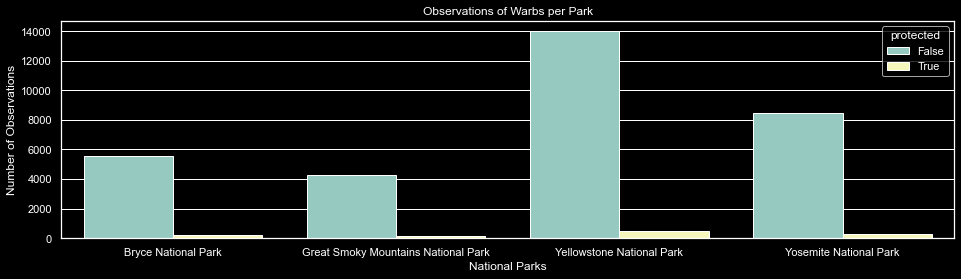

In [56]:
plt.figure(figsize=(16, 4))
plt.style.use(["dark_background"])

sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Warbs per Park')
plt.show()